### Project : 
## Human Activity Recognition : Predictions using ML Models

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd

In [2]:
# Reading data from CSV file

train = pd.read_csv('UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_Dataset/csv_files/test.csv')

In [3]:
# Checking the shape of train and test

print(train.shape)
print(test.shape)

(7352, 564)
(2947, 564)


In [4]:
# Displaying first 5 rows of training data

train.head(5)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Subject,Activity,Activity_Name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,Standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,Standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,Standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,Standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,Standing


In [5]:
# Displaying first 5 rows of testing data

test.head(5)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [6]:
# Getting X_train and y_train from train data

X_train = train.drop(['Subject', 'Activity', 'Activity_Name'], axis=1)
y_train = train.Activity

In [7]:
# Getting X_test and y_test from test data

X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.Activity

In [8]:
# Displaying the shape of training and testing data

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [9]:
# Let's use Linear discriminant analysis to find features that classifies the label well

# Importing libraries

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [10]:
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [11]:
# Displaying the shape of training and testing data

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 5),(7352,))
X_test  and y_test  : ((2947, 5),(2947,))


## Let's define some generic functions to create ML models

### Function to plot Confusion Matrix

In [12]:
# Importing necessary libraries

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [13]:
# Creating a function to print text in Bold and in given color

from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [14]:
# Function to plot Confusion Matrix

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [15]:
# Generic function to any model

from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # Let's create an empty dictionary to be returned by the function
    results = dict()
    
    # Let's calculate & print the total training time
    
    train_start_time = datetime.now()
    model.fit(X_train, y_train)
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    printmd('Training_time(HH:MM:SS.ms) - {}'.format(results['training_time']), color='blue')
        
    # Let's calculate & print the test time
    
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    printmd('testing time(HH:MM:SS:ms) - {}'.format(results['testing_time']), color='blue')
    results['predicted'] = y_pred
   
    # Let's calculate the Accuracy of Model
    
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    results['accuracy'] = accuracy
    printmd('**Accuracy:**', color='blue')
    print('{}'.format(accuracy))
        
    # Let's get the Confusion Matrix
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    # Plotting Confusion Matrix
    
    printmd('**Confusion Matrix:**', color='blue')
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=labels, title='Normalized confusion matrix', cmap=plt.cm.YlGn, )
    plt.show()
        
    # Plotting Normalized Confusion Matrix
    
    printmd('**Normalized Confusion Matrix:**', color='blue')
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # PLotting classification report
    
    printmd('**Classifiction Report**', color='blue')
    classification_report = metrics.classification_report(y_test, y_pred)
    results['classification_report'] = classification_report
    print(classification_report)
    
    # Adding the trained model to the results
    
    results['model'] = model
    
    return results

In [16]:
def print_grid_search_attributes(model):
    
    # Let's print the best estimator that gave highest score
    
    printmd('**Best Estimator:**', color='blue')
    print('{}\n'.format(model.best_estimator_))


    # Let's print the best parameters that gave best results
    
    printmd('**Best parameters:**', color='blue')
    print('{}\n'.format(model.best_params_))


    #  Let's print the number of cross validation splits
    
    printmd('**Number of CrossValidation sets:**', color='blue')
    print('{}\n'.format(model.n_splits_))


    # Let's print the Best score of the best estimator
    
    printmd('**Best Score:**', color='blue')
    print('{}\n'.format(model.best_score_))

## Applying various Machine learning model with Grid-Search

### 1. Logistic Regression

In [17]:
# Importing necessary libraries

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [18]:
# Creating a list labels to be added to plots

labels=['Laying', 'Sitting','Standing','Walking','Walking_Downstairs','Walking_Upstairs']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:00:03.267407</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00.002174</span>

<span style='color:blue'>**Accuracy:**</span>

0.9613165931455717


<span style='color:blue'>**Confusion Matrix:**</span>

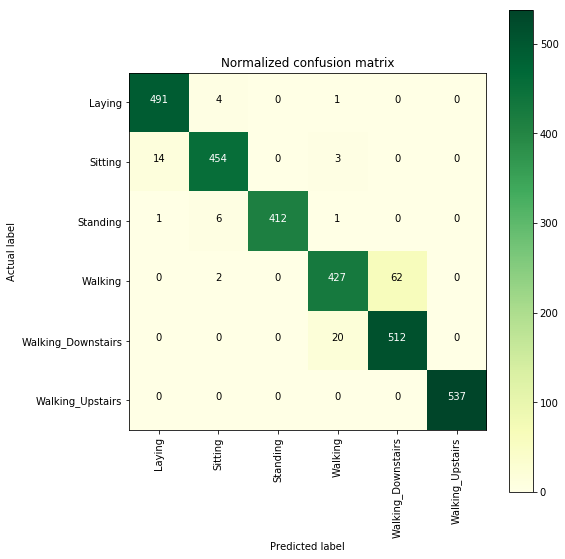

<span style='color:blue'>**Normalized Confusion Matrix:**</span>

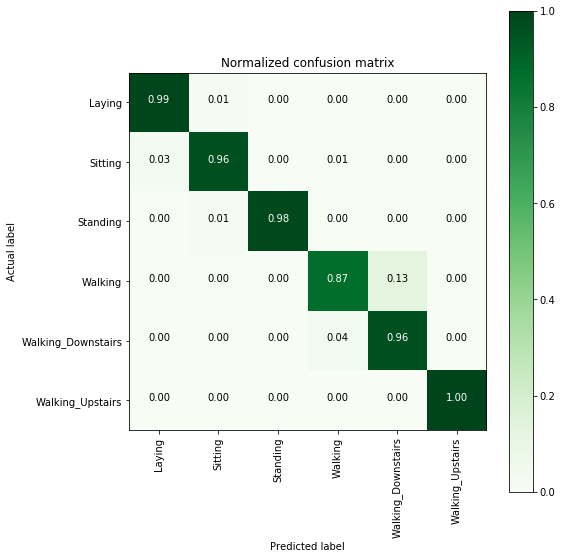

<span style='color:blue'>**Classifiction Report**</span>

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       496
           2       0.97      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.94      0.87      0.91       491
           5       0.89      0.96      0.93       532
           6       1.00      1.00      1.00       537

   micro avg       0.96      0.96      0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



<span style='color:blue'>**Best Estimator:**</span>

LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)



<span style='color:blue'>**Best parameters:**</span>

{'C': 30, 'penalty': 'l1'}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

3



<span style='color:blue'>**Best Score:**</span>

0.9846300326441785



In [19]:
# Let's define the parameters to be tuned

parameters = {'C':[20, 25, 30, 35, 40], 'penalty':['l1', 'l2']}

# Let's initiate the model

log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Printing the best attributes of the model 

print_grid_search_attributes(log_reg_grid_results['model'])

### 2. Support Vector Classifier

In [20]:
# Importing Necessary libraries

from sklearn.svm import LinearSVC

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  18 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:00:00.696371</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00</span>

<span style='color:blue'>**Accuracy:**</span>

0.9630132337970818


<span style='color:blue'>**Confusion Matrix:**</span>

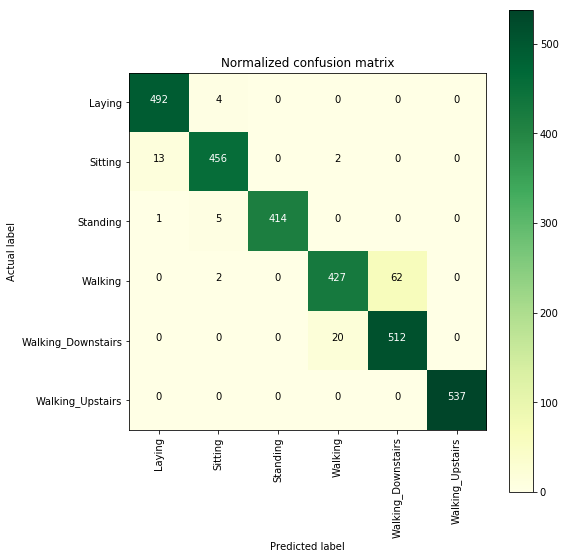

<span style='color:blue'>**Normalized Confusion Matrix:**</span>

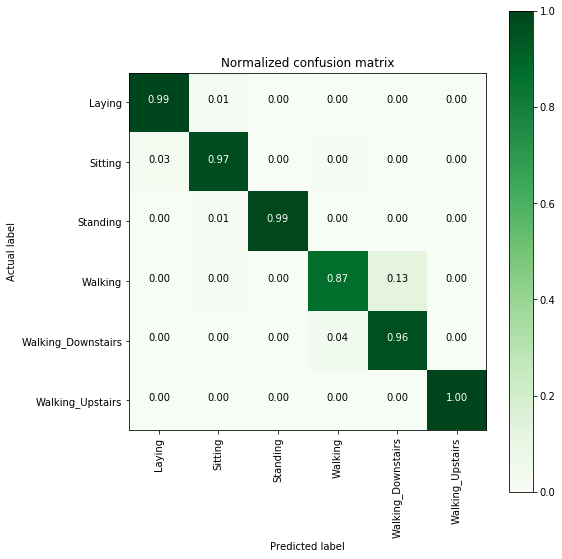

<span style='color:blue'>**Classifiction Report**</span>

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       496
           2       0.98      0.97      0.97       471
           3       1.00      0.99      0.99       420
           4       0.95      0.87      0.91       491
           5       0.89      0.96      0.93       532
           6       1.00      1.00      1.00       537

   micro avg       0.96      0.96      0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



<span style='color:blue'>**Best Estimator:**</span>

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)



<span style='color:blue'>**Best parameters:**</span>

{'C': 1}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

3



<span style='color:blue'>**Best Score:**</span>

0.985038084874864



In [21]:
# Let's define the parameters to be tuned

parameters = {'C':[0.25, 0.5, 1, 2, 4, 8]}

# Let's initiate the model

lin_svc = LinearSVC()
lin_svc_grid = GridSearchCV(lin_svc, param_grid=parameters, verbose=1, n_jobs=-1)
lin_svc_grid_results = perform_model(lin_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Printing the best attributes of the model 

print_grid_search_attributes(lin_svc_grid_results['model'])

### 3. Kernel SVM

In [22]:
# Importing Libraries

from sklearn.svm import SVC

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:00:49.726736</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00.048000</span>

<span style='color:blue'>**Accuracy:**</span>

0.9657278588394977


<span style='color:blue'>**Confusion Matrix:**</span>

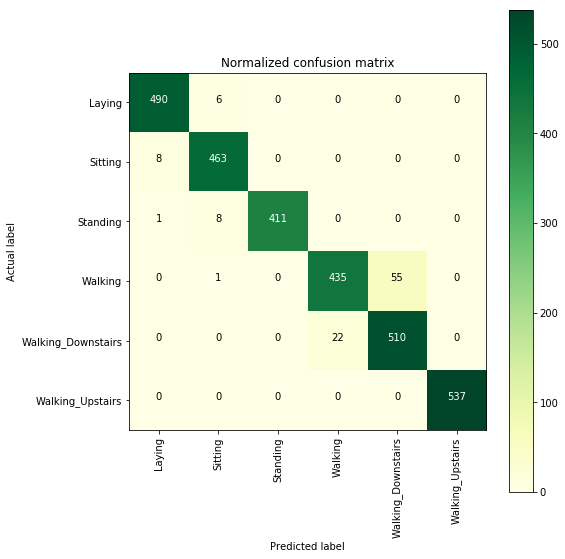

<span style='color:blue'>**Normalized Confusion Matrix:**</span>

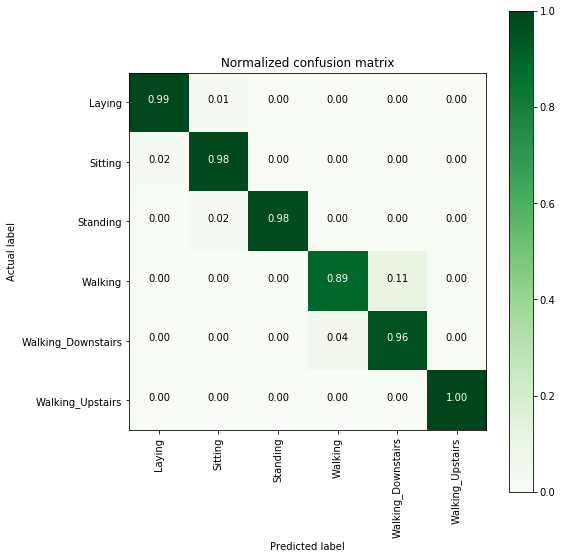

<span style='color:blue'>**Classifiction Report**</span>

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       496
           2       0.97      0.98      0.98       471
           3       1.00      0.98      0.99       420
           4       0.95      0.89      0.92       491
           5       0.90      0.96      0.93       532
           6       1.00      1.00      1.00       537

   micro avg       0.97      0.97      0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



<span style='color:blue'>**Best Estimator:**</span>

SVC(C=0.25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)



<span style='color:blue'>**Best parameters:**</span>

{'C': 0.25, 'gamma': 0.01}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

3



<span style='color:blue'>**Best Score:**</span>

0.986126224156692



In [23]:
# Let's define the parameters to be tuned

parameters = {'C':[0.125, 0.25, 0.5, 1], 'gamma':[0.01, 0.1, 1, 2]}

# Let's initiate the model

rbf_svc = SVC(kernel='rbf')
rbf_svc_grid = GridSearchCV(rbf_svc, param_grid=parameters)
rbf_svc_grid_results = perform_model(rbf_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Printing the best attributes of the model 

print_grid_search_attributes(rbf_svc_grid_results['model'])

### 4. Decision Tree

In [24]:
# Importing libraries

from sklearn.tree import DecisionTreeClassifier

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  18 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished


<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:00:00.145372</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00</span>

<span style='color:blue'>**Accuracy:**</span>

0.9514760773668137


<span style='color:blue'>**Confusion Matrix:**</span>

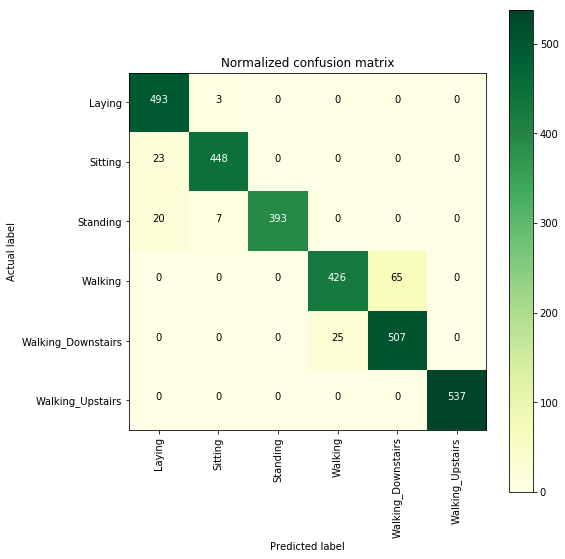

<span style='color:blue'>**Normalized Confusion Matrix:**</span>

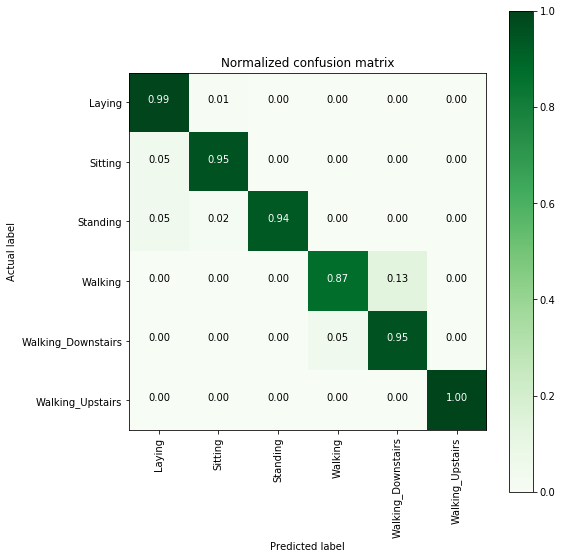

<span style='color:blue'>**Classifiction Report**</span>

              precision    recall  f1-score   support

           1       0.92      0.99      0.96       496
           2       0.98      0.95      0.96       471
           3       1.00      0.94      0.97       420
           4       0.94      0.87      0.90       491
           5       0.89      0.95      0.92       532
           6       1.00      1.00      1.00       537

   micro avg       0.95      0.95      0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



<span style='color:blue'>**Best Estimator:**</span>

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')



<span style='color:blue'>**Best parameters:**</span>

{'max_depth': 5}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

3



<span style='color:blue'>**Best Score:**</span>

0.9831338411316648



In [25]:
# Let's define the parameters to be tuned

parameters = {'max_depth':np.arange(4,10,1)}

# Let's initiate the model

dtree = DecisionTreeClassifier()
dtree_grid = GridSearchCV(dtree, param_grid=parameters, verbose=1, n_jobs=-1)
dtree_grid_results = perform_model(dtree_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Printing the best attributes of the model 

print_grid_search_attributes(dtree_grid_results['model'])

### 5. Random Forest Classifier

In [26]:
# Importing libraries

from sklearn.ensemble import RandomForestClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:00:21.379325</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00.034036</span>

<span style='color:blue'>**Accuracy:**</span>

0.9619952494061758


<span style='color:blue'>**Confusion Matrix:**</span>

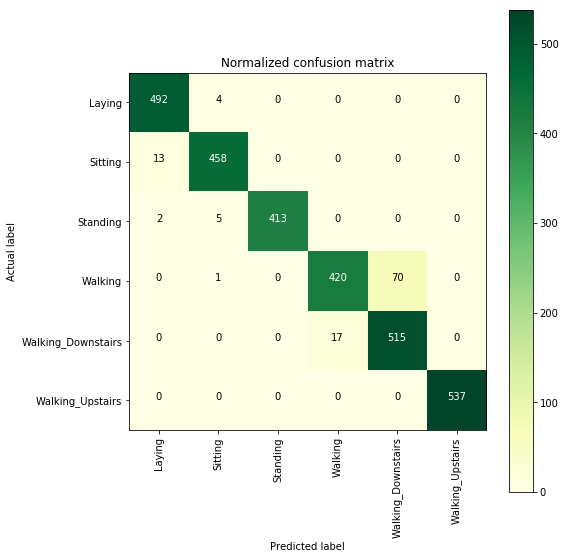

<span style='color:blue'>**Normalized Confusion Matrix:**</span>

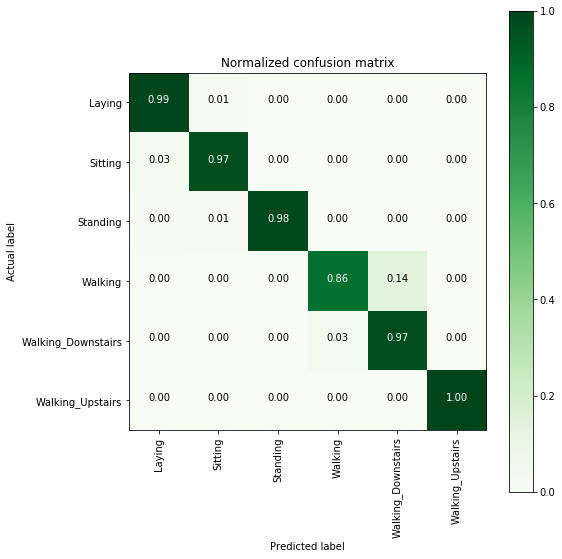

<span style='color:blue'>**Classifiction Report**</span>

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       496
           2       0.98      0.97      0.98       471
           3       1.00      0.98      0.99       420
           4       0.96      0.86      0.91       491
           5       0.88      0.97      0.92       532
           6       1.00      1.00      1.00       537

   micro avg       0.96      0.96      0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



<span style='color:blue'>**Best Estimator:**</span>

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)



<span style='color:blue'>**Best parameters:**</span>

{'max_depth': 6, 'n_estimators': 110}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

3



<span style='color:blue'>**Best Score:**</span>

0.9857181719260065



In [27]:
# Let's define the parameters to be tuned

parameters = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(4,15,2)}

# Let's initiate the model

rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=parameters, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Printing the best attributes of the model 

print_grid_search_attributes(rfc_grid_results['model'])

### 6. Gradient Boosted Decision Tree

In [28]:
# Importing Libraries

from sklearn.ensemble import GradientBoostingClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


<span style='color:blue'>Training_time(HH:MM:SS.ms) - 0:00:26.123057</span>

<span style='color:blue'>testing time(HH:MM:SS:ms) - 0:00:00.033001</span>

<span style='color:blue'>**Accuracy:**</span>

0.9541907024092298


<span style='color:blue'>**Confusion Matrix:**</span>

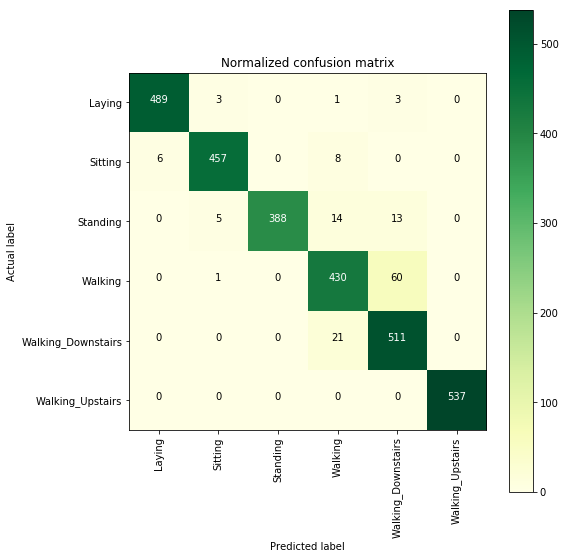

<span style='color:blue'>**Normalized Confusion Matrix:**</span>

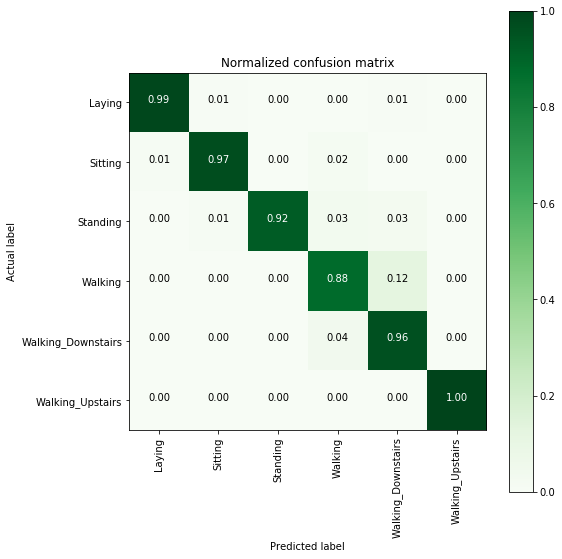

<span style='color:blue'>**Classifiction Report**</span>

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       496
           2       0.98      0.97      0.98       471
           3       1.00      0.92      0.96       420
           4       0.91      0.88      0.89       491
           5       0.87      0.96      0.91       532
           6       1.00      1.00      1.00       537

   micro avg       0.95      0.95      0.95      2947
   macro avg       0.96      0.95      0.95      2947
weighted avg       0.96      0.95      0.95      2947



<span style='color:blue'>**Best Estimator:**</span>

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=140,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)



<span style='color:blue'>**Best parameters:**</span>

{'max_depth': 5, 'n_estimators': 140}



<span style='color:blue'>**Number of CrossValidation sets:**</span>

3



<span style='color:blue'>**Best Score:**</span>

0.9831338411316648



In [29]:
# Let's define the parameters to be tuned

parameters = {'n_estimators': np.arange(120,150,10), 'max_depth':np.arange(3,7,1)}

# Let's initiate the model

gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=parameters, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Printing the best attributes of the model 

print_grid_search_attributes(gbdt_grid_results['model'])

### Let's compare all the models together

In [34]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%      {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lin_svc_grid_results['accuracy'] * 100,\
                                                        100-(lin_svc_grid_results['accuracy'] * 100)))

print('RBF SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svc_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svc_grid_results['accuracy'] * 100)))

print('Decision Tree       : {:.04}%      {:.04}% '.format(dtree_grid_results['accuracy'] * 100,\
                                                        100-(dtree_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%       {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting    : {:.04}%      {:.04}% '.format(gbdt_grid_results['accuracy'] * 100,\
                                                        100-(gbdt_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.13%      3.868%
Linear SVC          : 96.3%       3.699% 
RBF SVM classifier  : 96.57%      3.427% 
Decision Tree       : 95.15%      4.852% 
Random Forest       : 96.2%       3.8% 
GradientBoosting    : 95.42%      4.581% 


## Conclusion

The above table shows that Logistic Regression, Linear SVC, RBF SVM classifier & Random Forest has highest Accuracy with lowest Error value. We can use any of these three models for future predictions